Plotting transformed images for class: Powdery mildew
Plotting transformed images for class: Healthy
Plotting transformed images for class: Cotton Boll Rot
Plotting transformed images for class: Bacterial blight
Plotting transformed images for class: Aphids


C:\Users\RoopaGanesh\anaconda3\envs\GG_1392\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
C:\Users\RoopaGanesh\anaconda3\envs\GG_1392\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Epoch 1/125 - Loss: 1.1592 Acc: 0.5687
Epoch 2/125 - Loss: 0.6981 Acc: 0.7776
Epoch 3/125 - Loss: 0.5835 Acc: 0.8151
Epoch 4/125 - Loss: 0.5174 Acc: 0.8353
Epoch 5/125 - Loss: 0.4662 Acc: 0.8558
Epoch 6/125 - Loss: 0.4366 Acc: 0.8611
Epoch 7/125 - Loss: 0.4208 Acc: 0.8654
Epoch 8/125 - Loss: 0.4097 Acc: 0.8697
Epoch 9/125 - Loss: 0.3914 Acc: 0.8733
Epoch 10/125 - Loss: 0.3815 Acc: 0.8704
Epoch 11/125 - Loss: 0.3687 Acc: 0.8805
Epoch 12/125 - Loss: 0.3759 Acc: 0.8760
Epoch 13/125 - Loss: 0.3510 Acc: 0.8779
Epoch 14/125 - Loss: 0.3498 Acc: 0.8822
Epoch 15/125 - Loss: 0.3467 Acc: 0.8882
Epoch 16/125 - Loss: 0.3348 Acc: 0.8923
Epoch 17/125 - Loss: 0.3381 Acc: 0.8877
Epoch 18/125 - Loss: 0.3235 Acc: 0.8947
Epoch 19/125 - Loss: 0.3145 Acc: 0.8986
Epoch 20/125 - Loss: 0.3204 Acc: 0.8942
Epoch 21/125 - Loss: 0.3108 Acc: 0.8969
Epoch 22/125 - Loss: 0.3178 Acc: 0.8911
Epoch 23/125 - Loss: 0.2985 Acc: 0.9007
Epoch 24/125 - Loss: 0.3021 Acc: 0.8959
Epoch 25/125 - Loss: 0.3000 Acc: 0.8986
Epoch 26/

C:\Users\RoopaGanesh\anaconda3\envs\GG_1392\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


The image is classified as class: Bacterial blight
Execution time: 34235.282536268234 seconds


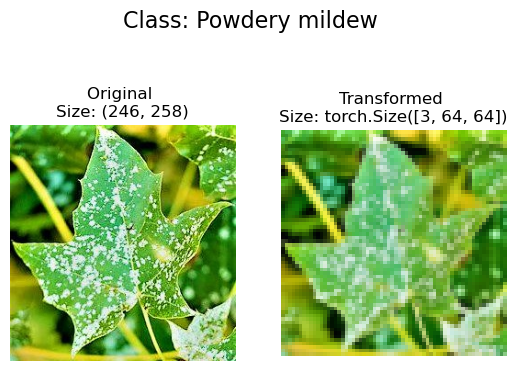

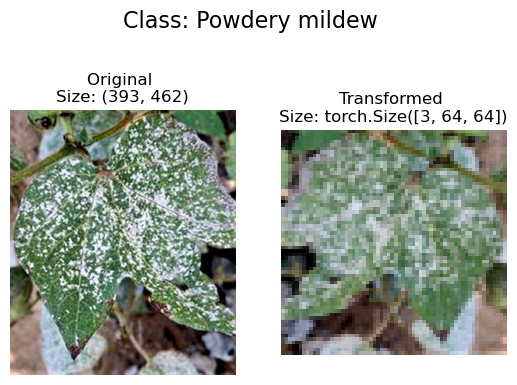

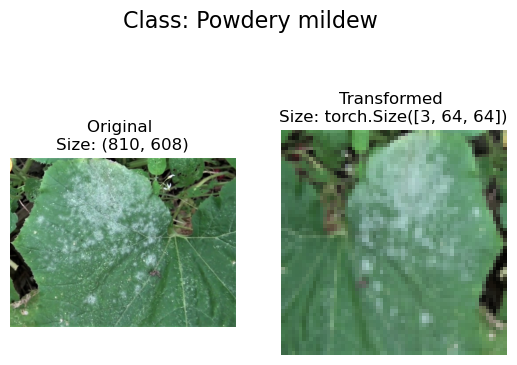

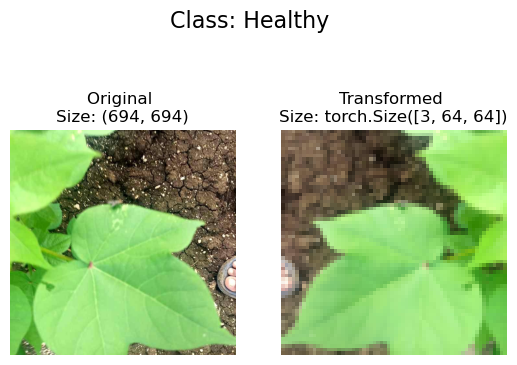

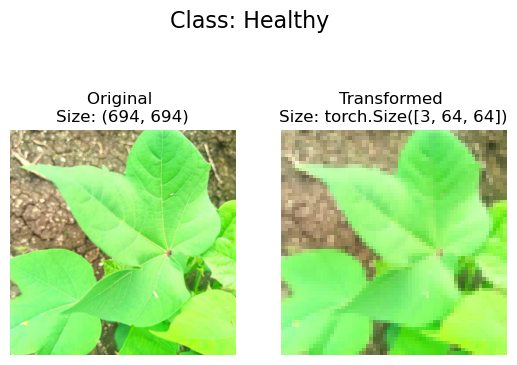

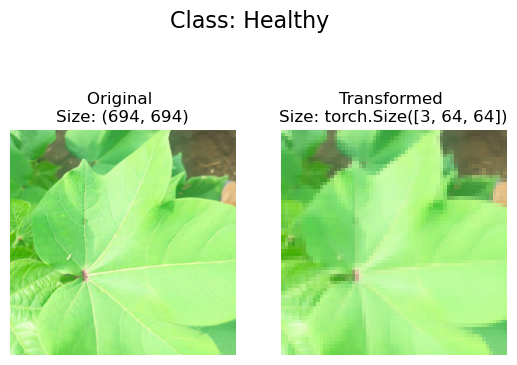

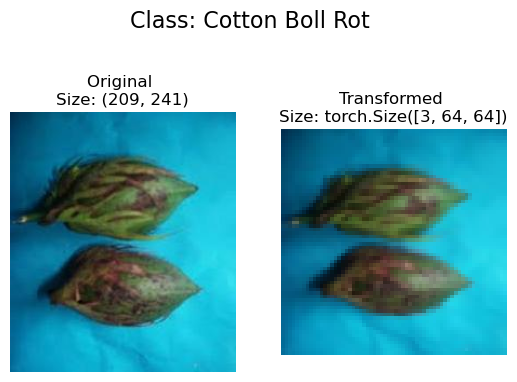

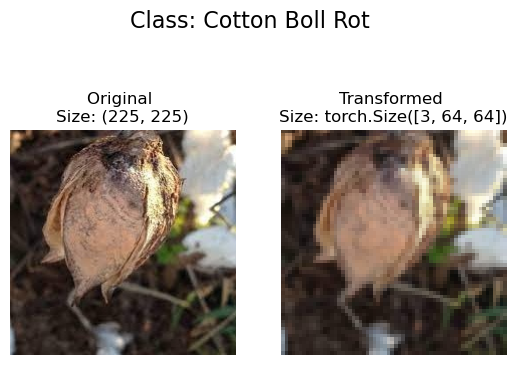

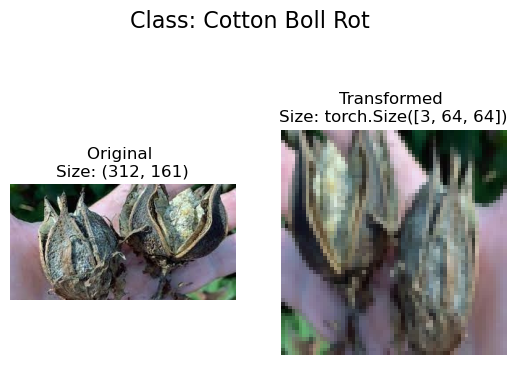

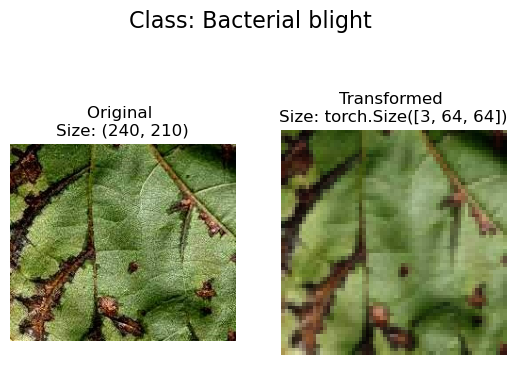

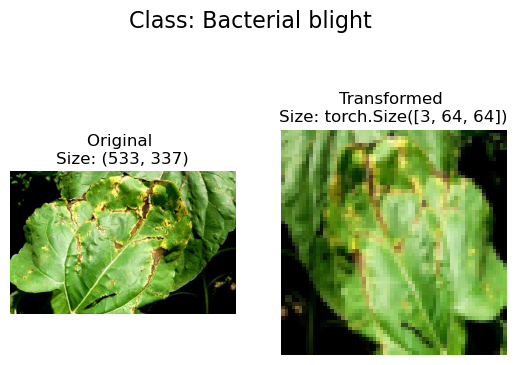

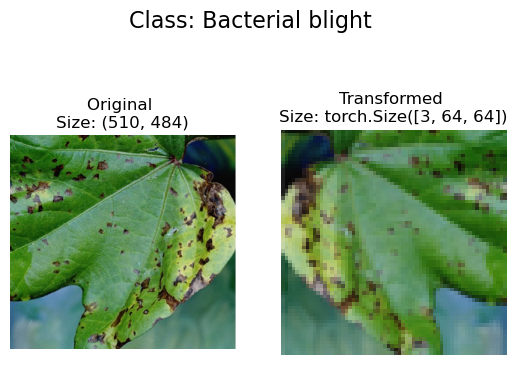

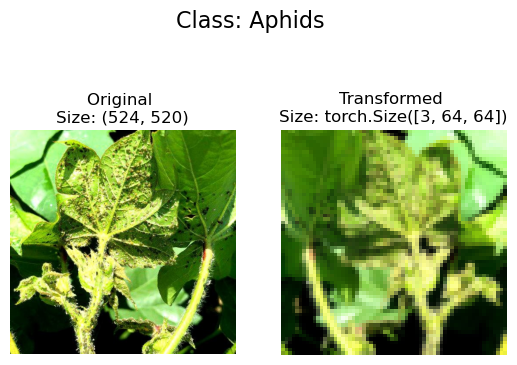

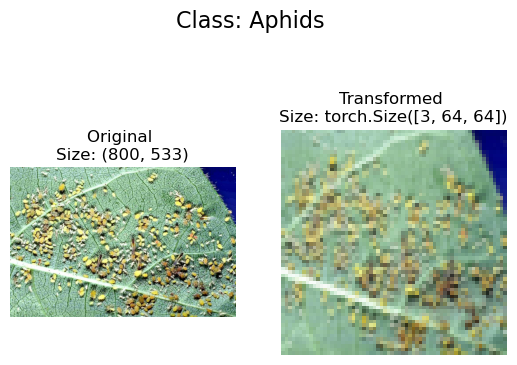

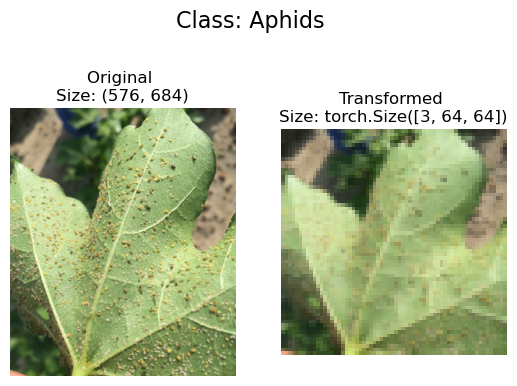

In [1]:
import time

# Record the start time
start_time = time.time()
import os
import random
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
from torchvision import transforms, datasets, models
from torch.utils.data import DataLoader
from PIL import Image
import matplotlib.pyplot as plt


device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")


def plot_transformed_images(image_paths, transform, n=3, seed=42):
    random.seed(seed)
    random_image_paths = random.sample(image_paths, k=n)
    for image_path in random_image_paths:
        with Image.open(image_path) as img:
            fig, ax = plt.subplots(1, 2)
            ax[0].imshow(img)
            ax[0].set_title(f"Original \nSize: {img.size}")
            ax[0].axis("off")

            transformed_image = transform(img)
            ax[1].imshow(transformed_image.permute(1, 2, 0))
            ax[1].set_title(f"Transformed \nSize: {transformed_image.shape}")
            ax[1].axis("off")

            class_name = os.path.basename(os.path.dirname(image_path))
            fig.suptitle(f"Class: {class_name}", fontsize=16)

data_transform = transforms.Compose([
    transforms.Resize(size=(64, 64)),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.ToTensor(),
])


main_folder = "C:\\Users\\RoopaGanesh\\Downloads\\Cotton leaves - Training\\800 Images"

classes = ["Powdery mildew", "Healthy", "Cotton Boll Rot", "Bacterial blight", "Aphids"]
class_to_idx = {cls: i for i, cls in enumerate(classes)}


class_images = {cls: [] for cls in classes}


for cls in classes:
    class_folder = os.path.join(main_folder, cls)
    for filename in os.listdir(class_folder):
        if filename.endswith(('.jpg', '.jpeg', '.png')):
            img_path = os.path.join(class_folder, filename)
            class_images[cls].append(img_path)


image_path_list = {cls: images for cls, images in class_images.items()}

for cls in classes:
    print(f"Plotting transformed images for class: {cls}")
    plot_transformed_images(image_path_list[cls], transform=data_transform, n=3)

train_data = datasets.ImageFolder(root=main_folder, transform=data_transform)
class_names = train_data.classes


train_dataloader = DataLoader(dataset=train_data, batch_size=64, shuffle=True)

model = models.resnet18(pretrained=True)
for param in model.parameters():
    param.requires_grad = False
model.fc.requires_grad = True
num_ftrs = model.fc.in_features
model.fc = nn.Linear(num_ftrs, len(class_names))
model = model.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.fc.parameters(), lr=0.001)

num_epochs = 125
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    corrects = 0

    for inputs, labels in train_dataloader:
        inputs = inputs.to(device)
        labels = labels.to(device)

        optimizer.zero_grad()

        with torch.set_grad_enabled(True):
            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)
            loss = criterion(outputs, labels)

            loss.backward()
            optimizer.step()

        running_loss += loss.item() * inputs.size(0)
        corrects += torch.sum(preds == labels.data)

    epoch_loss = running_loss / len(train_data)
    epoch_acc = corrects.double() / len(train_data)

    print(f'Epoch {epoch + 1}/{num_epochs} - Loss: {epoch_loss:.4f} Acc: {epoch_acc:.4f}')

# Save the fine-tuned model( with the weights that we want)
torch.save(model.state_dict(), "first_tuned_model_cotton_disease.pth")

# Testing phase
test_image_path = "C:\\Users\\RoopaGanesh\\Downloads\\Cotton leaves - Training\\11.jpg"
test_image = Image.open(test_image_path)

data_transform_test = transforms.Compose([
    transforms.Resize(size=(64, 64)),
    transforms.ToTensor()
])

transformed_test_image = data_transform_test(test_image)
transformed_test_image = transformed_test_image.unsqueeze(0)

model_test = models.resnet18(pretrained=False)
model_test.fc = nn.Linear(model_test.fc.in_features, len(class_names))
model_test.load_state_dict(torch.load("first_tuned_model_cotton_disease.pth"))
model_test.eval()
transformed_test_image = transformed_test_image.to(device)
model_test = model_test.to(device)

with torch.no_grad():
    outputs_test = model_test(transformed_test_image)
    _, predicted_test = torch.max(outputs_test, 1)

predicted_class_test = class_names[predicted_test.item()]
print(f"The image is classified as class: {predicted_class_test}")

# Record the end time
end_time = time.time()

# Calculate the elapsed time
elapsed_time = end_time - start_time

# Print the elapsed time
print(f"Execution time: {elapsed_time} seconds")
